In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade nltk
!pip install --upgrade matplotlib
%matplotlib inline

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 749 kB 36.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 11.2 MB 5.4 MB/s 
     |███████████████████████████████

In [32]:
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [2]:
dataframe = pd.read_csv('train_bodies.csv')

In [3]:
dataframe.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_stances.csv to train_stances.csv
User uploaded file "train_stances.csv" with length 4305273 bytes


In [4]:
dataframe_titles = pd.read_csv('train_stances.csv')

In [6]:
dataframe_titles.assign(NewCol1='articleBody',
         NewCol2=np.NaN
        )
dataframe_titles.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [7]:
dataframe_titles.sort_values(by=['Body ID'])

,Headline,Body ID,Stance
27879,Soldier shot near Canadian parliament building,0,unrelated
21704,Caught a catfish record in Po: 127 kg and 2.67...,0,unrelated
7110,Enormous 20-stone catfish caught with fishing ...,0,unrelated
12573,Soldier shot at war memorial in Canada,0,unrelated
16307,A soldier has been shot at Canada’s war memori...,0,unrelated
...,...,...,...
46450,Ann Arbor pizza delivery driver surprised with...,2532,agree
41950,"Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",2532,agree
34899,"Pizza delivery man gets $2,000 tip",2532,agree
15822,"Pizza delivery driver surprised with $2,000 tip",2532,agree


In [8]:
uniqueValues = dataframe_titles['Body ID'].unique()
uniqueValues

array([ 712,  158,  137, ...,  915,  407, 1066])

In [9]:
# dfinal = dataframe_titles.merge(dataframe, on="Body ID", how='left')
dfinal = pd.read_csv('train_stances.csv')

In [10]:

for i in tqdm(uniqueValues):
  #print(i)
  dataframe_titles.loc[dataframe_titles['Body ID']==i , 'Body ID']=dataframe.loc[dataframe['Body ID']==i]['articleBody'].item()

100%|██████████| 1683/1683 [05:29<00:00,  5.11it/s]


In [11]:
dataframe_titles.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\r\n...,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree
2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated
4,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree


In [12]:
dataframe_final = dataframe_titles.copy()

In [13]:
dataframe_final.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\r\n...,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree
2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated
4,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree


In [14]:
dataframe_final.rename(columns={'Body ID': 'Text'},inplace=True)
dataframe_final.head()

,Headline,Text,Stance
0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\r\n...,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree
2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated
4,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree


In [16]:
dfinal['Headline'] = dfinal['Headline'].str.lower()
dataframe['articleBody'] = dataframe['articleBody'].str.lower()
dataframe.head()

,Body ID,articleBody
0,0,a small meteorite crashed into a wooded area i...
1,4,last week we hinted at what was to come as ebo...
2,5,(newser) – wonder how long a quarter pounder w...
3,6,"posting photos of a gun-toting child online, i..."
4,7,at least 25 suspected boko haram insurgents we...


In [17]:
dfinal.head()

,Headline,Body ID,Stance
0,police find mass graves with at least '15 bodi...,712,unrelated
1,hundreds of palestinians flee floods in gaza a...,158,agree
2,"christian bale passes on role of steve jobs, a...",137,unrelated
3,hbo and apple in talks for $15/month apple tv ...,1034,unrelated
4,spider burrowed through tourist's stomach and ...,1923,disagree


In [18]:
dataframe_final['Headline']=dataframe_final['Headline'].str.lower()
# dfinal['Headline'] = dfinal['Headline'].str.lower()
dataframe_final['Text']=dataframe_final['Text'].str.lower()
dataframe['articleBody'] = dataframe['articleBody'].str.lower()
dataframe_final.head()

,Headline,Text,Stance
0,police find mass graves with at least '15 bodi...,danny boyle is directing the untitled film\r\n...,unrelated
1,hundreds of palestinians flee floods in gaza a...,hundreds of palestinians were evacuated from t...,agree
2,"christian bale passes on role of steve jobs, a...",30-year-old moscow resident was hospitalized w...,unrelated
3,hbo and apple in talks for $15/month apple tv ...,(reuters) - a canadian soldier was shot at the...,unrelated
4,spider burrowed through tourist's stomach and ...,"fear not arachnophobes, the story of bunbury's...",disagree


In [19]:
dfinal = dfinal.merge(dataframe, on="Body ID", how='left')
dfinal.head()

,Headline,Body ID,Stance,articleBody
0,police find mass graves with at least '15 bodi...,712,unrelated,danny boyle is directing the untitled film\r\n...
1,hundreds of palestinians flee floods in gaza a...,158,agree,hundreds of palestinians were evacuated from t...
2,"christian bale passes on role of steve jobs, a...",137,unrelated,30-year-old moscow resident was hospitalized w...
3,hbo and apple in talks for $15/month apple tv ...,1034,unrelated,(reuters) - a canadian soldier was shot at the...
4,spider burrowed through tourist's stomach and ...,1923,disagree,"fear not arachnophobes, the story of bunbury's..."


In [20]:
dataframe.head()

,Body ID,articleBody
0,0,a small meteorite crashed into a wooded area i...
1,4,last week we hinted at what was to come as ebo...
2,5,(newser) – wonder how long a quarter pounder w...
3,6,"posting photos of a gun-toting child online, i..."
4,7,at least 25 suspected boko haram insurgents we...


In [21]:
dfinal['Headline'] = dfinal['Headline'].str.replace('[^\w\s]','')
dataframe['articleBody'] = dataframe['articleBody'].str.replace('[^\w\s]','')
dfinal.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Headline,Body ID,Stance,articleBody
0,police find mass graves with at least 15 bodie...,712,unrelated,danny boyle is directing the untitled film\r\n...
1,hundreds of palestinians flee floods in gaza a...,158,agree,hundreds of palestinians were evacuated from t...
2,christian bale passes on role of steve jobs ac...,137,unrelated,30-year-old moscow resident was hospitalized w...
3,hbo and apple in talks for 15month apple tv st...,1034,unrelated,(reuters) - a canadian soldier was shot at the...
4,spider burrowed through tourists stomach and u...,1923,disagree,"fear not arachnophobes, the story of bunbury's..."


In [22]:
dataframe_final["Headline"] = dataframe_final["Headline"].str.replace('[^\w\s]','')
dataframe_final['Text']=dataframe_final['Text'].str.replace('[^\w\s]','')
dataframe['articleBody'] = dataframe['articleBody'].str.replace('[^\w\s]','')
dataframe_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Headline,Text,Stance
0,police find mass graves with at least 15 bodie...,danny boyle is directing the untitled film\r\n...,unrelated
1,hundreds of palestinians flee floods in gaza a...,hundreds of palestinians were evacuated from t...,agree
2,christian bale passes on role of steve jobs ac...,30yearold moscow resident was hospitalized wit...,unrelated
3,hbo and apple in talks for 15month apple tv st...,reuters a canadian soldier was shot at the ca...,unrelated
4,spider burrowed through tourists stomach and u...,fear not arachnophobes the story of bunburys s...,disagree


In [23]:
dataframe.head()

,Body ID,articleBody
0,0,a small meteorite crashed into a wooded area i...
1,4,last week we hinted at what was to come as ebo...
2,5,newser wonder how long a quarter pounder with...
3,6,posting photos of a guntoting child online isi...
4,7,at least 25 suspected boko haram insurgents we...


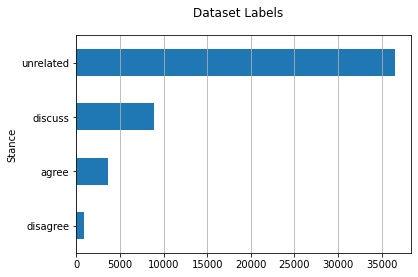

In [24]:

fig, ax = plt.subplots()
fig.suptitle("Dataset Labels", fontsize=12)
dataframe_final["Stance"].reset_index().groupby("Stance").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()


## Remove stopwords

In [25]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά

stop = stopwords.words('english')
dataframe_final['Headline'] =dataframe_final['Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataframe_final['Text'] = dataframe_final['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataframe['articleBody'] = dataframe['articleBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
dfinal['Headline'] = dfinal['Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataframe['articleBody'] = dataframe['articleBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [27]:
dfinal.head()

,Headline,Body ID,Stance,articleBody
0,police find mass graves least 15 bodies near m...,712,unrelated,danny boyle is directing the untitled film\r\n...
1,hundreds palestinians flee floods gaza israel ...,158,agree,hundreds of palestinians were evacuated from t...
2,christian bale passes role steve jobs actor re...,137,unrelated,30-year-old moscow resident was hospitalized w...
3,hbo apple talks 15month apple tv streaming ser...,1034,unrelated,(reuters) - a canadian soldier was shot at the...
4,spider burrowed tourists stomach chest,1923,disagree,"fear not arachnophobes, the story of bunbury's..."


In [28]:
dataframe.head()

,Body ID,articleBody
0,0,small meteorite crashed wooded area nicaraguas...
1,4,last week hinted come ebola fears spread acros...
2,5,newser wonder long quarter pounder cheese last...
3,6,posting photos guntoting child online isis sup...
4,7,least 25 suspected boko haram insurgents kille...


In [29]:
dataframe_final.head()

,Headline,Text,Stance
0,police find mass graves least 15 bodies near m...,danny boyle directing untitled film seth rogen...,unrelated
1,hundreds palestinians flee floods gaza israel ...,hundreds palestinians evacuated homes sunday m...,agree
2,christian bale passes role steve jobs actor re...,30yearold moscow resident hospitalized wounds ...,unrelated
3,hbo apple talks 15month apple tv streaming ser...,reuters canadian soldier shot canadian war mem...,unrelated
4,spider burrowed tourists stomach chest,fear arachnophobes story bunburys spiderman mi...,disagree


## Tokenizing

In [30]:
nltk.download('punkt') # χρειάζεται για το tokenizer
dataframe_final['Text']=dataframe_final['Text'].apply(nltk.word_tokenize)
dataframe_final['Headline']=dataframe_final['Headline'].apply(nltk.word_tokenize)
dfinal['Headline'] = dfinal['Headline'].apply(nltk.word_tokenize)
dataframe['articleBody']=dataframe['articleBody'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
dfinal.head()

,Headline,Body ID,Stance,articleBody
0,"[police, find, mass, graves, least, 15, bodies...",712,unrelated,danny boyle is directing the untitled film\r\n...
1,"[hundreds, palestinians, flee, floods, gaza, i...",158,agree,hundreds of palestinians were evacuated from t...
2,"[christian, bale, passes, role, steve, jobs, a...",137,unrelated,30-year-old moscow resident was hospitalized w...
3,"[hbo, apple, talks, 15month, apple, tv, stream...",1034,unrelated,(reuters) - a canadian soldier was shot at the...
4,"[spider, burrowed, tourists, stomach, chest]",1923,disagree,"fear not arachnophobes, the story of bunbury's..."


In [33]:
dataframe.head()

,Body ID,articleBody
0,0,"[small, meteorite, crashed, wooded, area, nica..."
1,4,"[last, week, hinted, come, ebola, fears, sprea..."
2,5,"[newser, wonder, long, quarter, pounder, chees..."
3,6,"[posting, photos, guntoting, child, online, is..."
4,7,"[least, 25, suspected, boko, haram, insurgents..."


In [34]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')

# from nltk.stem import WordNetLemmatizer
# wordnet_lemmatizer = WordNetLemmatizer()

porter_stemmer = PorterStemmer()

dataframe_final_stem=dataframe_final.copy()
# dataframe_final_lemma=dataframe_final.copy()
dataframe_article_stem = dataframe.copy()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
# def lemmatize_text(text):
#     lemmatizer = WordNetLemmatizer()
#     return [lemmatizer.lemmatize(w) for w in text]
# nltk.download('omw-1.4')


# dataframe_final_lemma['Text']=dataframe_final_lemma['Text'].apply(lemmatize_text)
# dataframe_final_lemma['Headline']=dataframe_final_lemma['Headline'].apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
# dataframe_final_lemma

,Headline,Text,Stance
0,"[police, find, mass, graf, least, 15, body, ne...","[danny, boyle, directing, untitled, film, seth...",unrelated
1,"[hundred, palestinian, flee, flood, gaza, isra...","[hundred, palestinian, evacuated, home, sunday...",agree
2,"[christian, bale, pass, role, steve, job, acto...","[30yearold, moscow, resident, hospitalized, wo...",unrelated
3,"[hbo, apple, talk, 15month, apple, tv, streami...","[reuters, canadian, soldier, shot, canadian, w...",unrelated
4,"[spider, burrowed, tourist, stomach, chest]","[fear, arachnophobes, story, bunburys, spiderm...",disagree
...,...,...,...
49967,"[urgent, leader, isil, abu, bakr, albaghdadi, ...","[cnn, boko, haram, laughed, nigeria, announcem...",unrelated
49968,"[brian, williams, slam, social, medium, specul...","[along, unveiling, apple, watch, earlier, year...",unrelated
49969,"[mexico, say, missing, student, found, first, ...","[body, found, mass, grave, confirmed, missing,...",agree
49970,"[u, lawmaker, ten, isi, fighter, apprehended, ...","[rep, duncan, hunter, rca, told, greta, van, s...",discuss


In [35]:
dataframe_final_stem['Text'] = dataframe_final_stem['Text'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
dataframe_final_stem['Headline'] = dataframe_final_stem['Headline'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
dataframe_article_stem['articleBody'] = dataframe['articleBody'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [36]:
dfinal['Headline'] = dfinal['Headline'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
dataframe['articleBody'] = dataframe['articleBody'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [37]:
dfinal.head()

,Headline,Body ID,Stance,articleBody
0,"[polic, find, mass, grave, least, 15, bodi, ne...",712,unrelated,danny boyle is directing the untitled film\r\n...
1,"[hundr, palestinian, flee, flood, gaza, israel...",158,agree,hundreds of palestinians were evacuated from t...
2,"[christian, bale, pass, role, steve, job, acto...",137,unrelated,30-year-old moscow resident was hospitalized w...
3,"[hbo, appl, talk, 15month, appl, tv, stream, s...",1034,unrelated,(reuters) - a canadian soldier was shot at the...
4,"[spider, burrow, tourist, stomach, chest]",1923,disagree,"fear not arachnophobes, the story of bunbury's..."


In [38]:
dataframe.head()

,Body ID,articleBody
0,0,"[small, meteorit, crash, wood, area, nicaragua..."
1,4,"[last, week, hint, come, ebola, fear, spread, ..."
2,5,"[newser, wonder, long, quarter, pounder, chees..."
3,6,"[post, photo, guntot, child, onlin, isi, suppo..."
4,7,"[least, 25, suspect, boko, haram, insurg, kill..."


In [39]:
dataframe_final_stem.head()

,Headline,Text,Stance
0,"[polic, find, mass, grave, least, 15, bodi, ne...","[danni, boyl, direct, untitl, film, seth, roge...",unrelated
1,"[hundr, palestinian, flee, flood, gaza, israel...","[hundr, palestinian, evacu, home, sunday, morn...",agree
2,"[christian, bale, pass, role, steve, job, acto...","[30yearold, moscow, resid, hospit, wound, inti...",unrelated
3,"[hbo, appl, talk, 15month, appl, tv, stream, s...","[reuter, canadian, soldier, shot, canadian, wa...",unrelated
4,"[spider, burrow, tourist, stomach, chest]","[fear, arachnophob, stori, bunburi, spiderman,...",disagree


In [40]:
dataframe_article_stem.head()

,Body ID,articleBody
0,0,"[small, meteorit, crash, wood, area, nicaragua..."
1,4,"[last, week, hint, come, ebola, fear, spread, ..."
2,5,"[newser, wonder, long, quarter, pounder, chees..."
3,6,"[post, photo, guntot, child, onlin, isi, suppo..."
4,7,"[least, 25, suspect, boko, haram, insurg, kill..."


In [41]:
# dfinal.to_csv('train_stances_stemmed_rev.csv', index = False)
# dataframe.to_csv('train_bodies_stemmed_rev.csv', index=False)
dfinal.to_csv('stem_train_stances.csv', index = False)
dataframe.to_csv('stem_train_bodies.csv', index=False)

In [ ]:
dataframe_article_stem.to_csv('train_bodies_stem.csv', index=False)

In [ ]:
dataframe_final_stem.to_csv('dataset_cleaned_stem.csv', index=False)

In [ ]:
total_vocabulary=[]
for j in dataframe_final_stem['Headline']:
  for word in j:
    if word not in total_vocabulary:
      total_vocabulary.append(word)

In [ ]:
for j in tqdm(dataframe_final_stem['Text']):
  for word in j:
    if word not in total_vocabulary:
      total_vocabulary.append(word)

100%|██████████| 49972/49972 [09:30<00:00, 87.65it/s]


In [ ]:
len(total_vocabulary)

18494

In [ ]:
def make_tfidf_scores(doc, X, vectorizer):
  doc = 0
  feature_index = X[doc,:].nonzero()[1]
  feature_names = vectorizer.get_feature_names_out() # κανονικα πρεπει να παιρνει το total vocabulary
  tfidf_scores = zip(feature_index, [X[doc, x] for x in feature_index])
  tfidf_dict = {}
  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    tfidf_dict[w] = s
  
  return tfidf_dict



In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# v = TfidfVectorizer(vocabulary=total_vocabulary)
# x = v.fit_transform(dataframe_final_stem['Headline'].apply(lambda x: ' '.join(x)))
#train_headlines_tfidf = v.fit_transform(dataframe_final_stem['Headline'].apply(lambda x: ' '.join(x)))
#train_bodies_tfidf= v.fit_transform(dataframe_final_stem['Text'].apply(lambda x: ' '.join(x)))

In [ ]:
# test = make_tfidf_scores(1,x,v)
# [vector_headline1,vector_headline2] [stance]

{'dam': 0.3547853761663509,
 'flee': 0.4081747364016902,
 'flood': 0.35667145928464145,
 'gaza': 0.3547853761663509,
 'hundr': 0.3158214920636291,
 'israel': 0.3547853761663509,
 'open': 0.2494214004146223,
 'palestinian': 0.4081747364016902}

In [ ]:
# train_bodies_tfidf= v.fit_transform(dataframe_final_stem['Text'].apply(lambda x: ' '.join(x)))

In [ ]:
#train_headlines_tfidf_array=train_headlines_tfidf.toarray()
#train_bodies_tfidf_array=train_bodies_tfidf.toarray()

In [ ]:
# bow_vectorizer = CountVectorizer()
# bow = bow_vectorizer.fit_transform(train_hearlies)  # Train set only


In [ ]:
# train_bodies_tfidf

<49972x18494 sparse matrix of type '<class 'numpy.float64'>'
	with 7097625 stored elements in Compressed Sparse Row format>

In [ ]:
# test_dataframe=pd.DataFrame(train_headlines_tfidf)

In [ ]:
# test_dataframe[0]

0          (0, 13)\t0.33085169085633054\n  (0, 12)\t0.2...
1          (0, 21)\t0.3547853761663509\n  (0, 20)\t0.24...
2          (0, 33)\t0.3189466316540892\n  (0, 32)\t0.31...
3          (0, 42)\t0.3744919085893536\n  (0, 41)\t0.26...
4          (0, 47)\t0.5411967032814544\n  (0, 46)\t0.44...
                               ...                        
49967      (0, 1138)\t0.4765705499477836\n  (0, 1081)\t...
49968      (0, 1724)\t0.3584972221947892\n  (0, 1723)\t...
49969      (0, 553)\t0.37489528481181783\n  (0, 412)\t0...
49970      (0, 1506)\t0.39636565601994406\n  (0, 1505)\...
49971      (0, 708)\t0.5500448980865826\n  (0, 447)\t0....
Name: 0, Length: 49972, dtype: object

In [ ]:
# test=[]
# for i in range(train_headlines_tfidf):
#   test.append([train_headlines_tfidf[i],train_bodies_tfidf[i]])

TypeError: ignored

In [ ]:
# v.get_feature_names_out()

array(['polic', 'find', 'mass', ..., 'cnet', 'bestbuy', 'nonappl'],
      dtype=object)